#**Work with CU-BEMS Data: Chamchuri 5 Building**

***Prepared by:*** [**Manisa Pipattanasomporn**](https://mpipatta.github.io)


This notebook explores the CU-BEMS dataset of Chamchuri 5 building. The goal is to demonstrate what analysis can be performed on the dataset and visualize some of the data.

***About Chamchuri 5:*** Chamchuri 5 is a seven-story academic office building located at Chulalongkorn University, Thailand. The building has the area of around 11,700 square meters (126,000 sqft). A typical building peak load is around 700kW. The building is equipped with CU-BEMS --the building energy management system, developed at Chulalongkorn University.  

***About the dataset:*** Available data for download are: power consumption (kW) of individual AC units, lighting and plug loads in each zone, on each floor of the building, together with corresponding indoor temperature (deg C), humidity (%) and illuminance (lux) in each zone. The data used here can be downloaded at https://sgrudata.github.io/.

---



#**1. Load the data**

Please download one of the csv files from https://sgrudata.github.io/, and upload the file to your Google drive. This notebook will use "*Floor7.csv*" for demonstration purpose. 

Since each CSV file is large (30-80MB), it is recommended that the files are uploaded to your Google drive, and we will connect this co-lab notebook to your Google drive to explore the dataset.

In [0]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
#mount your google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#read file from the path in your google drive 
#to obtain the file path, navigate the file via left navigation pane; 
#right click at the file and click "copy paht"
path = "/content/drive/...../Final_Floor_7.csv"
df = pd.read_csv(path)
df.head(5)

,Date,z1_AC1(kW),z1_AC2(kW),z1_AC3(kW),z1_AC4(kW),z1_Light(kW),z1_Plug(kW),z1_S1(degC),z1_S1(RH%),z1_S1(lux),z1_S2(degC),z1_S2(RH%),z1_S2(lux),z2_AC1(kW),z2_Light(kW),z2_Plug(kW),z2_S1(degC),z2_S1(RH%),z2_S1(lux),z2_S2(degC),z2_S2(RH%),z2_S2(lux),z3_Light(kW),z3_Plug(kW),z3_S1(degC),z3_S1(RH%),z3_S1(lux),z4_AC1(kW),z4_Light(kW),z4_Plug(kW),z4_S1(degC),z4_S1(RH%),z4_S1(lux),z5_AC1(kW),z5_Light(kW),z5_Plug(kW),z5_S1(degC),z5_S1(RH%),z5_S1(lux)
0,2018-07-01 00:00:00,0.0,0.0,0.01,0.0,0.0,0.02,NaN,NaN,NaN,28.23,64.42,0.0,0.0,0.0,0.0,28.57,66.24,0.0,28.75,72.70,0.0,0.02,0.18,30.49,69.53,0.0,0.0,0.21,0.0,29.4,65.16,0.0,0.0,0.0,0.03,28.93,66.72,0.0
1,2018-07-01 00:01:00,0.0,0.0,0.01,0.0,0.0,0.02,28.28,71.35,0.0,28.23,64.42,0.0,0.0,0.0,0.0,28.56,66.26,0.0,28.74,72.70,0.0,0.02,0.15,30.49,69.56,0.0,0.0,0.18,0.0,29.3,65.17,0.0,0.0,0.0,0.03,28.92,66.70,0.0
2,2018-07-01 00:02:00,0.0,0.0,0.01,0.0,0.0,0.02,28.27,71.38,0.0,28.23,64.42,0.0,0.0,0.0,0.0,28.56,66.28,0.0,28.74,72.71,0.0,0.02,0.21,30.49,69.58,0.0,0.0,0.21,0.0,29.3,65.18,0.0,0.0,0.0,0.05,28.92,66.70,0.0
3,2018-07-01 00:03:00,0.0,0.0,0.01,0.0,0.0,0.02,28.27,71.38,0.0,28.23,64.42,0.0,0.0,0.0,0.0,28.56,66.29,0.0,28.74,72.71,0.0,0.02,0.18,30.49,69.61,0.0,0.0,0.25,0.0,29.3,65.18,0.0,0.0,0.0,0.14,28.92,66.70,0.0
4,2018-07-01 00:04:00,0.0,0.0,0.01,0.0,0.0,0.02,28.27,71.38,0.0,28.23,64.44,0.0,0.0,0.0,0.0,28.56,66.32,0.0,28.74,72.71,0.0,0.02,0.18,30.49,69.63,0.0,0.0,0.22,0.0,29.4,65.18,0.0,0.0,0.0,0.13,28.92,66.70,0.0


In [4]:
#check the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 39 columns):
Date            525600 non-null object
z1_AC1(kW)      521235 non-null float64
z1_AC2(kW)      521235 non-null float64
z1_AC3(kW)      521235 non-null float64
z1_AC4(kW)      495792 non-null float64
z1_Light(kW)    517573 non-null float64
z1_Plug(kW)     519118 non-null float64
z1_S1(degC)     286481 non-null float64
z1_S1(RH%)      286481 non-null float64
z1_S1(lux)      286481 non-null float64
z1_S2(degC)     278019 non-null float64
z1_S2(RH%)      278019 non-null float64
z1_S2(lux)      275571 non-null float64
z2_AC1(kW)      495791 non-null float64
z2_Light(kW)    517573 non-null float64
z2_Plug(kW)     522727 non-null float64
z2_S1(degC)     292359 non-null float64
z2_S1(RH%)      292359 non-null float64
z2_S1(lux)      292359 non-null float64
z2_S2(degC)     276893 non-null float64
z2_S2(RH%)      276893 non-null float64
z2_S2(lux)      276893 non-null float64
z3_Light(k



---


#**2. Missing Value Plot**

We will plot missing values for this floor to visualize where the missing values in the data are. We will use Seaborn's heatmap plot. 

In the plot below, X-axis represents each data reading on this floor. Y-axis represents time of measurements from Jul 2018 to Jun 2019.

*   z1...5 = Zone
*   AC = power consumption of individual AC unit (kW)
*   Light = power consumption of lighting load (kW)
*   Plug = power consumption of plug load (kW)
*   S1(degC) = Temperature readings (degC)
*   S1(RH%) = Relative humidity readings (%)
*   S1(lux) = Ambient light condition readings (lux)



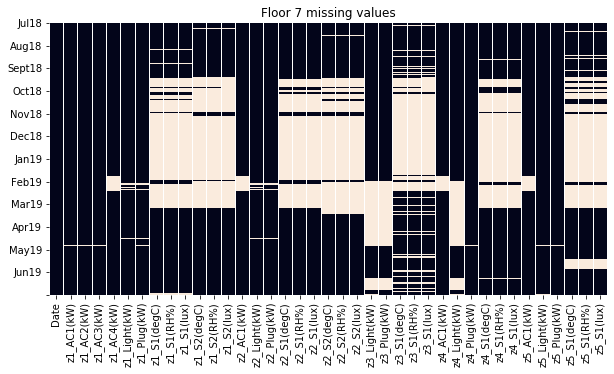

In [5]:
num_ticks=13 #tick number for Y-axis
plt.figure(figsize = (10,5))
ax = sns.heatmap(df.isnull(),cbar=False,
                 yticklabels=['Jul18','Aug18','Sept18','Oct18','Nov18','Dec18',
          'Jan19','Feb19','Mar19','Apr19','May19','Jun19',''])
ax.set_yticks(np.linspace(0,525600,num_ticks,dtype=np.int))
ax.set_title('Floor 7 missing values')
plt.show()



---


#**3. Histogram Plot**

We will demonstrate the histogram plots for selected AC units, as well as lighting and plug loads on Floor 7.



/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


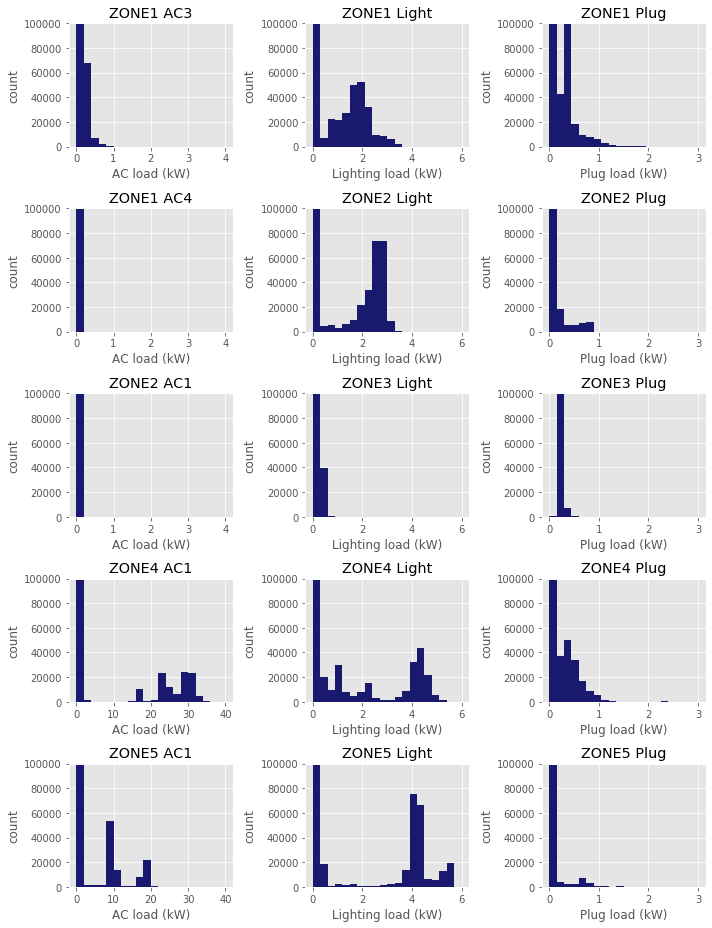

In [6]:
ylim=[4,4,4,40,40,40,40] #set Y limit
b=20 #set bin number
#set title 
title1A = ['z1_AC3(kW)', 'z1_AC4(kW)','z2_AC1(kW)','z4_AC1(kW)','z5_AC1(kW)']
title2A = ['ZONE1 AC3', 'ZONE1 AC4', 'ZONE2 AC1', 'ZONE4 AC1', 'ZONE5 AC1']
title1L = ['z1_Light(kW)', 'z2_Light(kW)', 'z3_Light(kW)','z4_Light(kW)','z5_Light(kW)']
title2L = ['ZONE1 Light', 'ZONE2 Light', 'ZONE3 Light', 'ZONE4 Light','ZONE5 Light']
title1P = ['z1_Plug(kW)', 'z2_Plug(kW)', 'z3_Plug(kW)','z4_Plug(kW)','z5_Plug(kW)']
title2P = ['ZONE1 Plug', 'ZONE2 Plug', 'ZONE3 Plug', 'ZONE4 Plug', 'ZONE5 Plug']

#create the sub-plot with 5 rows and 3 columns.
plt.style.use('ggplot')
fig, axs = plt.subplots(len(title1A), 3, figsize=(10,13), gridspec_kw={'width_ratios':[1,1,1]}, tight_layout=True)

#plot histogram of AC units in all 5 zones.
for i in np.arange(len(title1A)):
  axs[i,0].hist(df[title1A[i]],bins=b, range=[0,ylim[i]], color='midnightblue')
  axs[i,0].set_title(title2A[i])
  axs[i,0].set_ylim([0,100000])
  axs[i,0].set_xlabel('AC load (kW)')
  axs[i,0].set_ylabel('count')
#plot histogram of lighting loads in all 5 zones.
for i in np.arange(len(title1L)):
  axs[i,1].hist(df[title1L[i]],bins=b, range=[0,6], color='midnightblue')
  axs[i,1].set_title(title2L[i])
  axs[i,1].set_ylim([0,100000])
  axs[i,1].set_xlabel('Lighting load (kW)')
  axs[i,1].set_ylabel('count')
#plot histogram of plug loads in all 5 zones.
for i in np.arange(len(title1P)):
  axs[i,2].hist(df[title1P[i]],bins=b, range=[0,3], color='midnightblue')
  axs[i,2].set_title(title2P[i])
  axs[i,2].set_ylim([0,100000])
  axs[i,2].set_xlabel('Plug load (kW)')
  axs[i,2].set_ylabel('count')


Below, we demonstrate the histogram plots for sensor readings (temperature, humidity and ambient light) on Floor 7. 

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


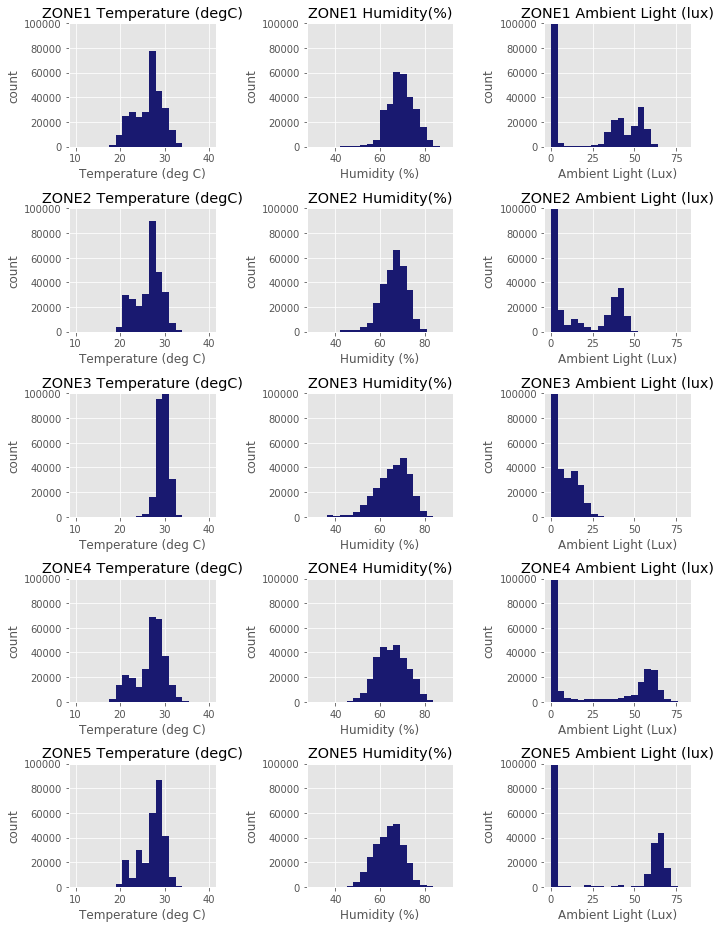

In [7]:
#set title 
title1T = ['z1_S1(degC)', 'z2_S1(degC)', 'z3_S1(degC)','z4_S1(degC)','z5_S1(degC)']
title2T = ['ZONE1 Temperature (degC)', 'ZONE2 Temperature (degC)', 'ZONE3 Temperature (degC)', 'ZONE4 Temperature (degC)', 'ZONE5 Temperature (degC)']
title1H = ['z1_S1(RH%)', 'z2_S1(RH%)', 'z3_S1(RH%)','z4_S1(RH%)','z5_S1(RH%)']
title2H = ['ZONE1 Humidity(%)', 'ZONE2 Humidity(%)', 'ZONE3 Humidity(%)', 'ZONE4 Humidity(%)', 'ZONE5 Humidity(%)']
title1I = ['z1_S1(lux)', 'z2_S1(lux)', 'z3_S1(lux)','z4_S1(lux)','z5_S1(lux)']
title2I = ['ZONE1 Ambient Light (lux)', 'ZONE2 Ambient Light (lux)', 'ZONE3 Ambient Light (lux)', 'ZONE4 Ambient Light (lux)','ZONE5 Ambient Light (lux)']

#create the sub-plot with 5 rows and 3 columns.
plt.style.use('ggplot')
fig, axs = plt.subplots(len(title1T), 3, figsize=(10,13), gridspec_kw={'width_ratios':[1,1,1]}, tight_layout=True)

#plot histogram of temperature readings in all 5 zones.
for i in np.arange(len(title1T)):
  axs[i,0].hist(df[title1T[i]],bins=b, range=[10,40], color='midnightblue')
  axs[i,0].set_title(title2T[i])
  axs[i,0].set_ylim([0,100000])
  axs[i,0].set_xlabel('Temperature (deg C)')
  axs[i,0].set_ylabel('count')

#plot histogram of humidity readings in all 5 zones.
for i in np.arange(len(title1H)):
  axs[i,1].hist(df[title1H[i]],bins=b, range=[30,90], color='midnightblue')
  axs[i,1].set_title(title2H[i])
  axs[i,1].set_ylim([0,100000])
  axs[i,1].set_xlabel('Humidity (%)')
  axs[i,1].set_ylabel('count')

#plot histogram of illuminance readings in all 5 zones.
for i in np.arange(len(title1I)):
  axs[i,2].hist(df[title1I[i]],bins=b, range=[0,80], color='midnightblue')
  axs[i,2].set_title(title2I[i])
  axs[i,2].set_ylim([0,100000])
  axs[i,2].set_xlabel('Ambient Light (Lux)')
  axs[i,2].set_ylabel('count')




---



#**4. Analyzing Weekly Patterns**

We will next visualize weekly patterns.


###**4.1 AC consumption + temperature/humidity measurements**
The first set of plots shows the electricity consumption (kW) of AC units, indoor temperature (deg C) and humidity (%) measurements on floor 7 by zone, during the period of one week from Sunday to Saturday. Here, only the consumption of large AC units (20-40kW) is plotted as they have high influence on indoor temperature and humidity in each respective zone. As expected, when an AC unit operates, indoor temperature in the same zone drops correspondingly; and when an AC unit turns off, indoor temperature rises. Zone 3 is unconditioned, hence temperature remains stable at around 30 deg C. 



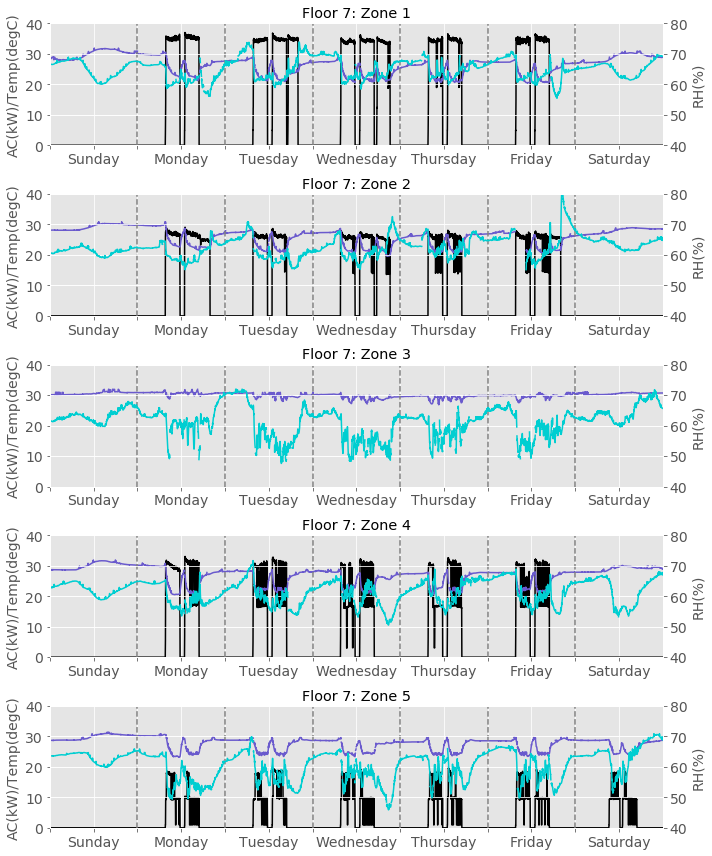

In [8]:
n=1     # Select which week to plot (n=0-51)
xrange=(1440*7*n,1440*7*(n+1))  #One day has 1440 minutes, so we plot the data for one week (7 days)
ylim1=(0,40)  # Set Y-axis1 limit
ylim2=(40,80) # Set Y-axis2 limit

# The following data columns will be plotted
title_AC = ['z1_AC4(kW)','z2_AC1(kW)','','z4_AC1(kW)','z5_AC1(kW)']
label_AC = ['ZONE1_AC4(kW)','ZONE2_AC1(kW)','','ZONE4_AC1(kW)','ZONE5_AC1(kW)']
title_temp = ['z1_S1(degC)','z2_S1(degC)','z3_S1(degC)','z4_S1(degC)','z5_S1(degC)']
label_temp = ['ZONE1 (Temp,degC)','ZONE2 (Temp,degC)','ZONE3 (Temp,degC)','ZONE4 (Temp,degC)','ZONE5 (Temp,degC)']
title_RH = ['z1_S1(RH%)','z2_S1(RH%)','z3_S1(RH%)','z4_S1(RH%)','z5_S1(RH%)']
label_RH = ['ZONE1 (RH,%)','ZONE2 (RH,%)','ZONE3 (RH,%)','ZONE4 (RH,%)','ZONE5 (RH,%)']
# These are the title to be set for each plot
title = ['Floor 7: Zone 1','Floor 7: Zone 2','Floor 7: Zone 3','Floor 7: Zone 4','Floor 7: Zone 5']

# Crate five subplots
plt.style.use('ggplot')
fig, axs = plt.subplots(len(title), figsize=(10,12), tight_layout=True)
plt.setp(axs, xticks=np.arange(14)*720+1440*7*n, # xtick at every 12 hours.
         xticklabels=['','Sunday','', 'Monday','','Tuesday','','Wednesday','','Thursday','','Friday','','Saturday'])

# Plot
i=0
for ax1 in axs.flat:
  if i!=2: # There is no AC in zone 3, so this plot is skipped.
    ax1.plot(df[title_AC[i]], color='black', label=label_AC[i]) # Plot AC based on the column heading
  ax1.plot(df[title_temp[i]], color='slateblue', label=label_temp[i]) # Plot temperature readings based on the column heading
  ax1.set_xlim(xrange)
  ax1.set_ylim(ylim1)
  ax1.set_ylabel('AC(kW)/Temp(degC)', fontsize=14)
  ax1.set_title(title[i])
  ax1.tick_params(axis='both', which ='major', labelsize=14)
  
  ax2 = ax1.twinx() # Create the secondary axis
  ax2.plot(df[title_RH[i]], color='darkturquoise', label=label_RH[i]) # Plot RH readings based on the column heading
  ax2.set_ylim(ylim2)
  ax2.set_ylabel('RH(%)', fontsize=14)
  ax2.tick_params(axis='both', which ='major', labelsize=14)
  i=i+1

# Draw vertical dash line
for i in np.arange(7)*1440+1440*7*n:
  for ax in axs.flat:
    ax.axvline(x=i, color='grey',linestyle='--')

###**4.2 Lighting & plug load consumption + illumination measurements**

The first set of plots depicts the relationship between lighting/plug load consumption (kW) and ambient light measurements (lux) on floor 7 by zone, during the period of one week from Sunday to Saturday. As shown, as the lights are on (i.e., power consumption of lighting load is greater than zero), ambient light measurements in the same zone increase. There is low lighting/plug load consumption on the weekend. The ambient light measurements in zones 3 and 4 indicate that the sensors can capture natural light. In zone 2, there is a partition within the zone that influences the amount of light that the sensor can capture. This reflects in the measurements on Sunday and Saturday, when not all lighting loads are turned on.





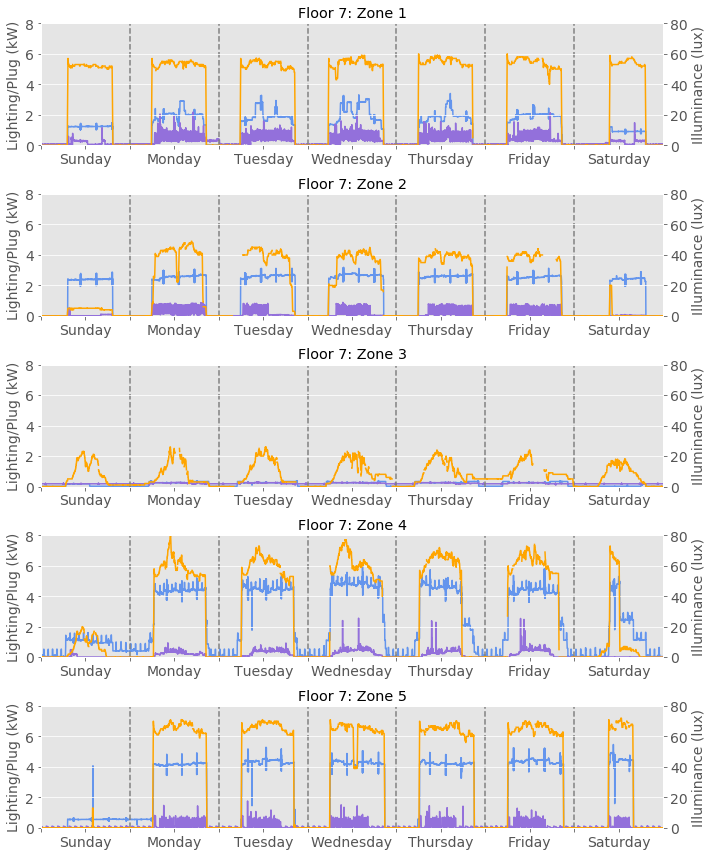

In [9]:
n=8
xrange=(1440*7*n,1440*7*n+1440*7)
yrange=(0,12)
ylim2=(0,80)

title_light = ['z1_Light(kW)','z2_Light(kW)','z3_Light(kW)','z4_Light(kW)','z5_Light(kW)']
title_plug = ['z1_Plug(kW)','z2_Plug(kW)','z3_Plug(kW)','z4_Plug(kW)','z5_Plug(kW)']
title_lux = ['z1_S1(lux)','z2_S1(lux)','z3_S1(lux)','z4_S1(lux)','z5_S1(lux)']
title = ['Floor 7: Zone 1','Floor 7: Zone 2','Floor 7: Zone 3','Floor 7: Zone 4','Floor 7: Zone 5']

plt.style.use('ggplot')
fig, axs = plt.subplots(len(title), figsize=(10,12), tight_layout=True)
plt.setp(axs, xticks=np.arange(14)*720+1440*7*n,
         xticklabels=['','Sunday','', 'Monday','','Tuesday','','Wednesday','','Thursday','','Friday','','Saturday'])

i=0
for ax1 in axs.flat:
  ax1.plot(df[title_light[i]], color='cornflowerblue')
  ax1.plot(df[title_plug[i]], color='mediumpurple')
  ax1.set_xlim(xrange)
  ax1.set_ylim(0,8)
  ax1.grid(False)
  ax1.set_ylabel('Lighting/Plug (kW)', fontsize=14)
  ax1.tick_params(axis='both', which ='major', labelsize=14) 
  ax1.set_title(title[i])

  ax2 = ax1.twinx()
  ax2.plot(df[title_lux[i]], color='orange')
  ax2.set_ylim(ylim2)
  ax2.set_ylabel('Illuminance (lux)', fontsize=14)
  ax2.tick_params(axis='both', which ='major', labelsize=14)  
  i=i+1

for i in np.arange(7)*1440+1440*7*n:
  for ax in axs.flat:
    ax.axvline(x=i, color='grey',linestyle='--')

#**5. Calculating Floor 7 SUM**

This section shows how a floor sum can be created and visualized.



In [10]:
# First, we will check the column names.
df.columns

Index(['Date', 'z1_AC1(kW)', 'z1_AC2(kW)', 'z1_AC3(kW)', 'z1_AC4(kW)',
       'z1_Light(kW)', 'z1_Plug(kW)', 'z1_S1(degC)', 'z1_S1(RH%)',
       'z1_S1(lux)', 'z1_S2(degC)', 'z1_S2(RH%)', 'z1_S2(lux)', 'z2_AC1(kW)',
       'z2_Light(kW)', 'z2_Plug(kW)', 'z2_S1(degC)', 'z2_S1(RH%)',
       'z2_S1(lux)', 'z2_S2(degC)', 'z2_S2(RH%)', 'z2_S2(lux)', 'z3_Light(kW)',
       'z3_Plug(kW)', 'z3_S1(degC)', 'z3_S1(RH%)', 'z3_S1(lux)', 'z4_AC1(kW)',
       'z4_Light(kW)', 'z4_Plug(kW)', 'z4_S1(degC)', 'z4_S1(RH%)',
       'z4_S1(lux)', 'z5_AC1(kW)', 'z5_Light(kW)', 'z5_Plug(kW)',
       'z5_S1(degC)', 'z5_S1(RH%)', 'z5_S1(lux)'],
      dtype='object')

In [0]:
# Then, we will add all electrical loads together.
df=df.fillna(0) #fill all missing data with zero.
df['Floor7Sum'] = df['z1_AC1(kW)']+df['z1_AC2(kW)']+df['z1_AC3(kW)']+df['z1_AC4(kW)']+df['z1_Light(kW)']+df['z1_Plug(kW)']+df['z2_AC1(kW)']+df['z2_Light(kW)']+df['z2_Plug(kW)']+df['z3_Light(kW)']+df['z3_Plug(kW)']+df['z4_AC1(kW)']+df['z4_Light(kW)']+df['z4_Plug(kW)']+df['z5_AC1(kW)']+df['z5_Light(kW)']+df['z5_Plug(kW)']

Text(0.5, 1.0, 'Floor 7 Load (kW)')

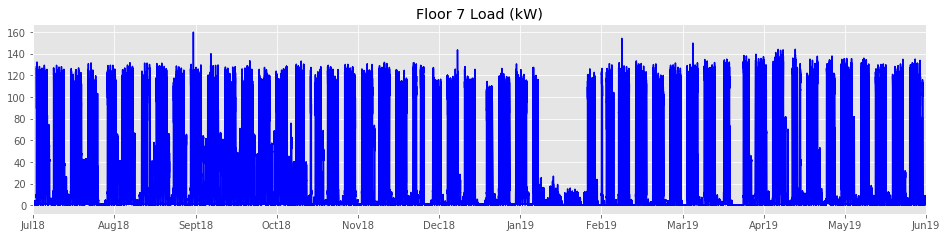

In [12]:
# Next, the electrical consumption is plotted for the entire year.
labels=['Jul18','Aug18','Sept18','Oct18','Nov18','Dec18','Jan19','Feb19','Mar19','Apr19','May19','Jun19']
ticks= np.linspace(0,525600,12)
plt.figure(figsize=(16,3.5))
ax = df['Floor7Sum'].plot(color='blue')#, ylim=(0,200))
plt.xticks(ticks,labels)
ax.set_title('Floor 7 Load (kW)')

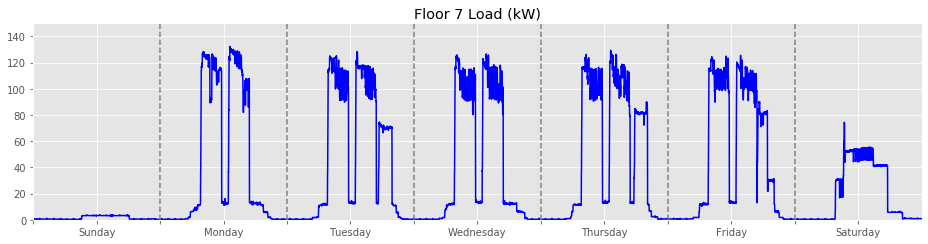

In [13]:
# We can also plot a selected week for data visualization.
n=0 #n=week, ranging from 0-51
xrange=(1440*7*n,1440*7*n+1440*7)
yrange=(0,150)
ticks = np.arange(14)*720+1440*7*n
labels = ['','Sunday','', 'Monday','','Tuesday','','Wednesday','','Thursday','','Friday','','Saturday']
plt.style.use('ggplot')
plt.figure(figsize=(13,3.5), tight_layout=True)
plt.xticks(ticks, labels)
ax = df['Floor7Sum'].plot(color='blue', xlim=xrange, ylim=yrange)
ax.set_title('Floor 7 Load (kW)')

for i in np.arange(7)*1440+1440*7*n:
  ax.axvline(x=i, color='grey',linestyle='--')

In [0]:
# We can also save the sum to a CSV file, using the command below.
df.to_csv ('Floor7.csv') 